In [1]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten


In [2]:

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)



17473536/17464789 [==============================] - 1s 0us/step


In [3]:
# Pad the sequences to have the same length
max_len = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)



In [4]:
# Build the model
model = Sequential()
model.add(Embedding(10000, 8, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))



2023-02-14 19:15:52.376371: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

2023-02-14 19:15:52.645008: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.5755 - acc: 0.7015 - val_loss: 0.3736 - val_acc: 0.8568
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2887 - acc: 0.8895 - val_loss: 0.2909 - val_acc: 0.8782
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2200 - acc: 0.9150 - val_loss: 0.2773 - val_acc: 0.8900
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 0.1863 - acc: 0.9287 - val_loss: 0.2683 - val_acc: 0.8932
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.1644 - acc: 0.9393 - val_loss: 0.2747 - val_acc: 0.8906
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 0.1452 - acc: 0.9467 - val_loss: 0.2855 - val_acc: 0.8918
Epoch 7/10
625/625 [==============================] - 3s 4ms/step - loss: 0.1298 - acc: 0.9547 - val_loss: 0.3158 - val_acc: 0.8848
Epoch 8/10
625/625 [==============================] - 3s 4ms/step - loss: 0.

In [6]:
model.save("IMDB.h5")

In [7]:
def predict_sentiment(texts):
    texts = [texts]
    word_index=imdb.get_word_index()
    text = [[word_index[word] for text in texts for word in text.split() if word in word_index]]
    text = sequence.pad_sequences(text, maxlen=max_len)
    prediction = model.predict(text)
    if prediction > 0.5:
        return 'Positive'
    else:
        return 'Negative'

In [8]:
predict_sentiment(' movie awful title')

1654784/1641221 [==============================] - 0s 0us/step


'Negative'

- Create virtual Envornment
 
    python -m ven <name>

    > .\<name>\Scripts\activate

    > install all packages from requirements.txt

    > pip install -r requirements.txt

    > Create file app.py


The following code was executed on VS Code to run a streamlit app
    
````
import streamlit as st
import numpy as np
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import load_model


st.title('IMDB Sentiment Analysis')
text = st.text_input('Enter a movie review:')

model = load_model('static\IMDB.h5')
#Define a function to predict the sentiment
def predict_sentiment(texts):
    texts = [texts]
    word_index=imdb.get_word_index()
    text = [[word_index[word] for text in texts for word in text.split() if word in word_index]]
    text = pad_sequences(text, maxlen=500)
    prediction = model.predict(text)
    if prediction > 0.5:
        return 'Positive'
    else:
        return 'Negative'

#Create the Streamlit application

if st.button('Predict'):
    sentiment = predict_sentiment(text)
    st.write('Sentiment: ', sentiment)
````

- Run your application now:
> streamlit run app.py


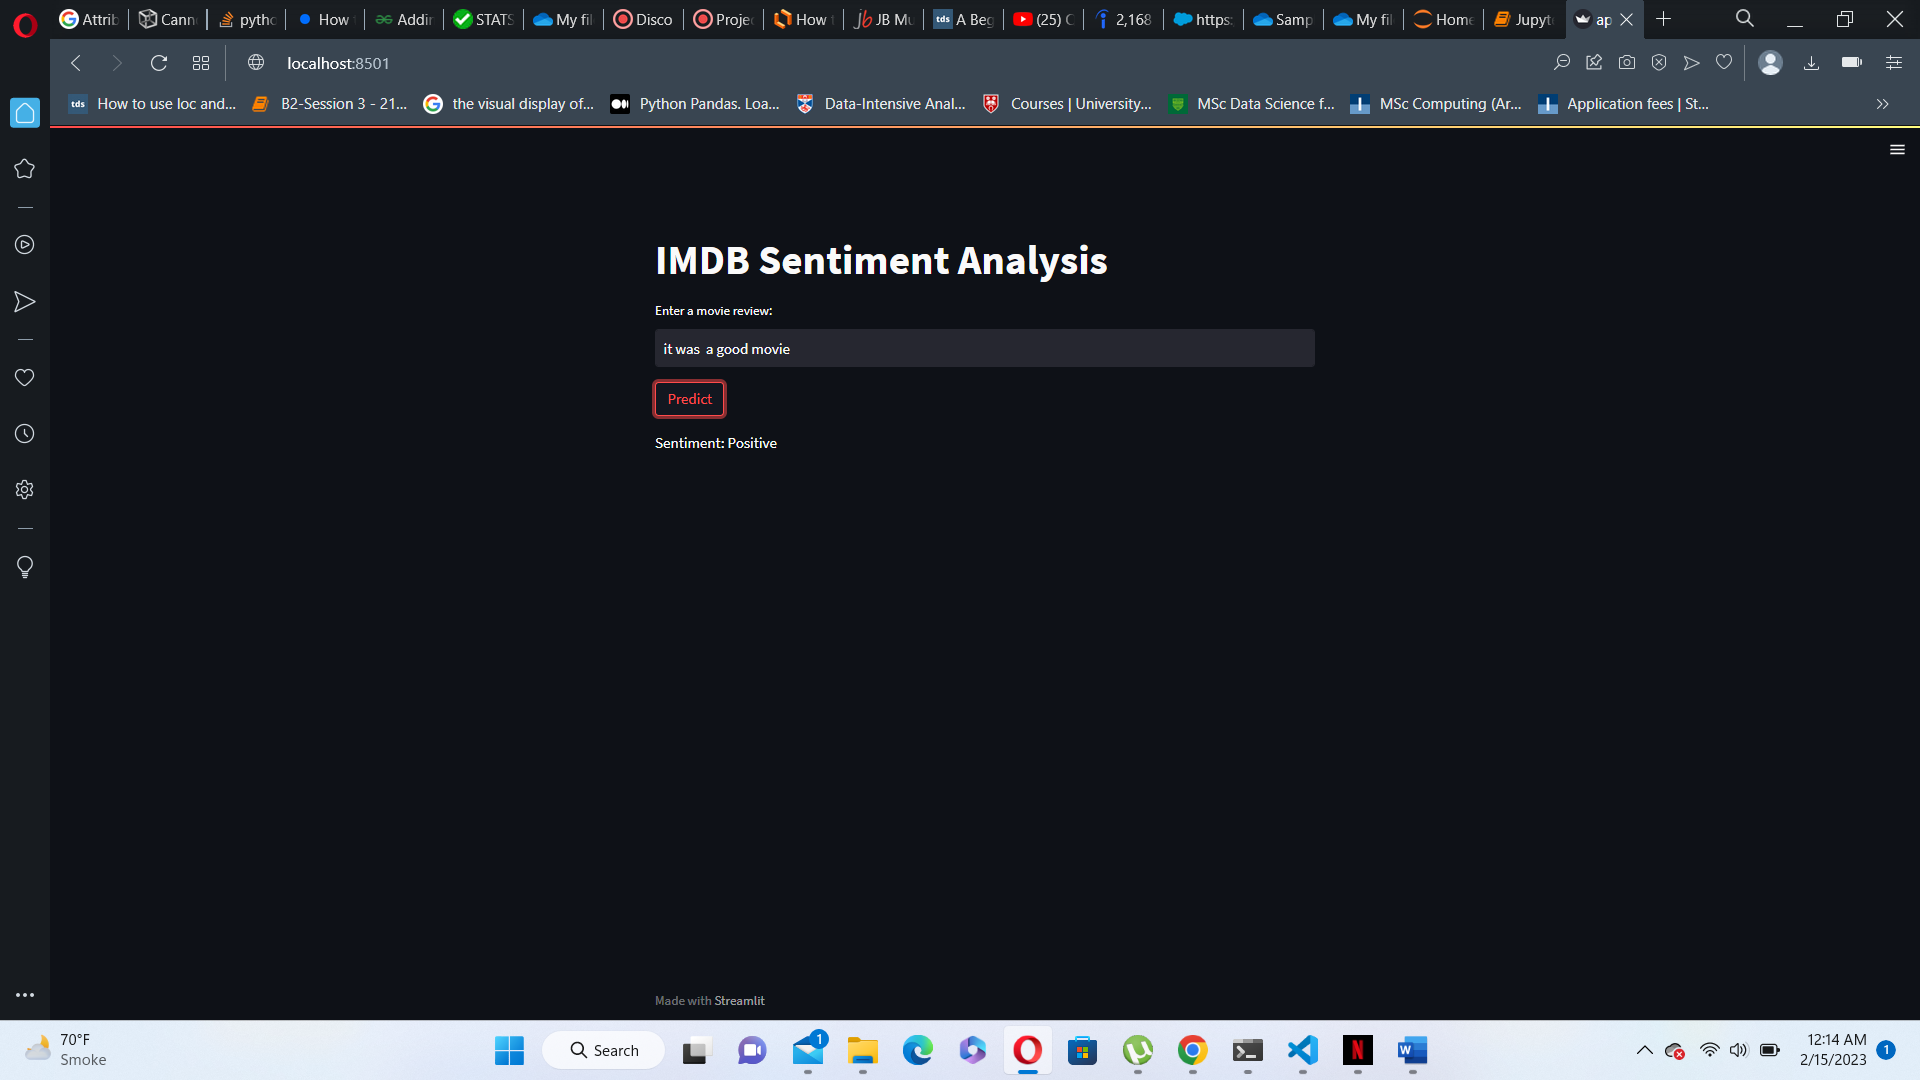